In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 11 20:46:26 2019

@author: tianjingrong
"""

# matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma

from sympy.interactive import printing
printing.init_printing()

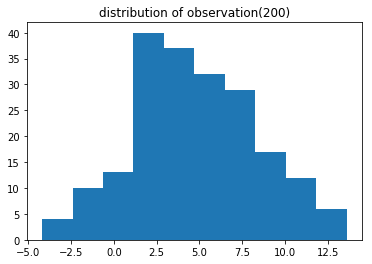

In [2]:
#########################################################################
##################
import seaborn as sns
nobs = 200
mu_true = 5
cov_true = 15

# generate samples
X = np.random.normal(mu_true, np.sqrt(cov_true), nobs)
v = np.var(X)
plt.hist(X)
plt.title("distribution of observation(200)")
plt.show()

/Users/tianjingrong/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


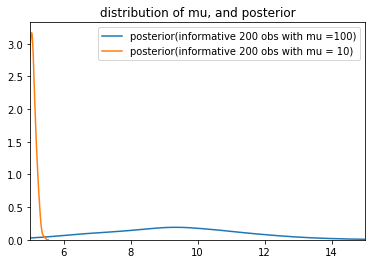

In [3]:
mu0 = 100
mu1= 10
mu2 = 1000
v0 = 10
alpha = 1
beta = 2

# posterior hyperparameters
mu0p = (v0*mu0+nobs*X.mean())/(v0+nobs)
mu1p = (v0*mu1+nobs*X.mean())/(v0+nobs)
mu2p = (v0*mu2+nobs*X.mean())/(v0+nobs)
v0p = v0+nobs
alphap =alpha+nobs/2
betap = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2
betap1 = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu1)**2/2
betap2 = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu2)**2/2

#posterior for mu is t-distribution with n-1 df
rsig = stats.invgamma.rvs(alphap, scale = betap,size = 1000)
rsig1 = stats.invgamma.rvs(alphap, scale = betap1,size = 1000)
rsig2 = stats.invgamma.rvs(alphap, scale = betap2,size = 1000)


r = [stats.norm.rvs(mu0p,i/v0p) for i in rsig]
r1 = [stats.norm.rvs(mu1p,i/v0p) for i in rsig1]
r2 = [stats.norm.rvs(mu2p,i/v0p) for i in rsig2]


sns.kdeplot(r, label = "posterior(informative 200 obs with mu =100)")
sns.kdeplot(r1, label = "posterior(informative 200 obs with mu = 10)")
#sns.kdeplot(r2, label = "posterior(informative 200 obs with mu = 1000)")
plt.xlim(5,15)
plt.title("distribution of mu, and posterior")
plt.legend()
plt.show()


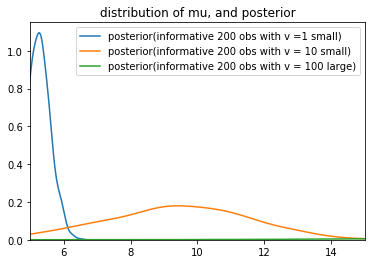

In [4]:
#Test for v
mu0 = 100
v0 = 1
v1 = 10
v2 = 100
alpha = 1
beta = 2

# posterior hyperparameters
mu0p = (v0*mu0+nobs*X.mean())/(v0+nobs)
mu1p = (v1*mu0+nobs*X.mean())/(v1+nobs)
mu2p = (v2*mu0+nobs*X.mean())/(v2+nobs)
v0p = v0+nobs
v1p = v1+nobs
v2p = v2+nobs
alphap =alpha+nobs/2
betap = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2
betap1 = beta+v*(nobs-1)+ nobs*v1/(v1+nobs)*(X.mean()-mu0)**2/2
betap2 = beta+v*(nobs-1)+ nobs*v2/(v2+nobs)*(X.mean()-mu0)**2/2

#posterior for mu is t-distribution with n-1 df
rsig = stats.invgamma.rvs(alphap, scale = betap,size = 1000)
rsig1 = stats.invgamma.rvs(alphap, scale = betap1,size = 1000)
rsig2 = stats.invgamma.rvs(alphap, scale = betap2,size = 1000)


r = [stats.norm.rvs(mu0p,i/v0p) for i in rsig]
r1 = [stats.norm.rvs(mu1p,i/v1p) for i in rsig1]
r2 = [stats.norm.rvs(mu2p,i/v2p) for i in rsig2]


sns.kdeplot(r, label = "posterior(informative 200 obs with v =1 small)")
sns.kdeplot(r1, label = "posterior(informative 200 obs with v = 10 small)")
sns.kdeplot(r2, label = "posterior(informative 200 obs with v = 100 large)")
plt.xlim(5,15)
plt.title("distribution of mu, and posterior")
plt.legend()
plt.show()


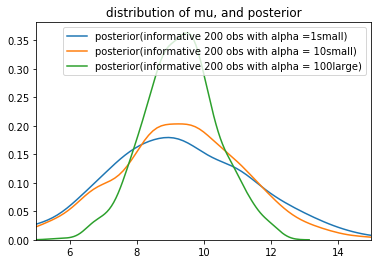

In [5]:
#Test for alpha
mu0 = 100
v0 = 10
alpha = 1
alpha1 = 10
alpha2 = 100
beta = 2

# posterior hyperparameters
mu0p = (v0*mu0+nobs*X.mean())/(v0+nobs)
v0p = v0+nobs
alphap =alpha+nobs/2
alphap1 = alpha1+nobs/2
alphap2 = alpha2+nobs/2
betap = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2

#posterior for mu is t-distribution with n-1 df
rsig = stats.invgamma.rvs(alphap, scale = betap,size = 1000)
rsig1 = stats.invgamma.rvs(alphap1, scale = betap,size = 1000)
rsig2 = stats.invgamma.rvs(alphap2, scale = betap,size = 1000)


r = [stats.norm.rvs(mu0p,i/v0p) for i in rsig]
r1 = [stats.norm.rvs(mu0p,i/v0p) for i in rsig1]
r2 = [stats.norm.rvs(mu0p,i/v0p) for i in rsig2]


sns.kdeplot(r, label = "posterior(informative 200 obs with alpha =1small)")
sns.kdeplot(r1, label = "posterior(informative 200 obs with alpha = 10small)")
sns.kdeplot(r2, label = "posterior(informative 200 obs with alpha = 100large)")
plt.xlim(5,15)
plt.title("distribution of mu, and posterior")
plt.legend()
plt.show()

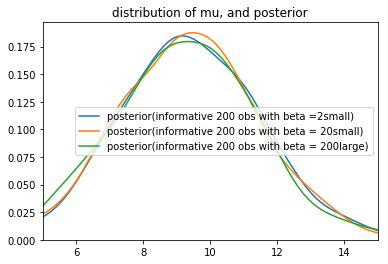

In [6]:
#Test for beta
mu0 = 100
v0 = 10
alpha = 1
beta = 2
beta1 = 20
beta2 = 200

# posterior hyperparameters
mu0p = (v0*mu0+nobs*X.mean())/(v0+nobs)
v0p = v0+nobs
alphap =alpha+nobs/2
betap = beta+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2
betap1 = beta1+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2
betap2 = beta2+v*(nobs-1)+ nobs*v0/(v0+nobs)*(X.mean()-mu0)**2/2


#posterior for mu is t-distribution with n-1 df
rsig = stats.invgamma.rvs(alphap, scale = betap,size = 1000)
rsig1 = stats.invgamma.rvs(alphap, scale = betap1,size = 1000)
rsig2 = stats.invgamma.rvs(alphap, scale = betap2,size = 1000)


r = [stats.norm.rvs(mu0p,i/v0p) for i in rsig]
r1 = [stats.norm.rvs(mu0p,i/v0p) for i in rsig1]
r2 = [stats.norm.rvs(mu0p,i/v0p) for i in rsig2]


sns.kdeplot(r, label = "posterior(informative 200 obs with beta =2small)")
sns.kdeplot(r1, label = "posterior(informative 200 obs with beta = 20small)")
sns.kdeplot(r2, label = "posterior(informative 200 obs with beta = 200large)")
plt.xlim(5,15)
plt.title("distribution of mu, and posterior")
plt.legend()
plt.show()